# USA Regional Sales Analysis
## Project Summary

This EDA notebook dives into Acme Co.’s 2014–2018 USA sales dataset through:

Data Profiling & Cleaning: Verified schema, handled missing budgets, and corrected data types.

Univariate & Bivariate Analysis: Explored distributions (revenue, margin, unit price), product/channel/region breakdowns, and customer segments.

Trend & Seasonality: Charted monthly and yearly sales patterns, highlighting recurring surges and dips.

Outlier Detection: Identified extreme transactions at both ends of the revenue and unit-price spectra.

Correlation & Segmentation: Assessed relationships between key metrics and clustered customers by revenue vs. profit margin.

#### Problem Statement
Analyze Acme Co.’s 2014–2018 sales data to identify key revenue and profit drivers across products, channels, and regions; uncover seasonal trends and outliers; and align performance against budgets. Use these insights to optimize pricing, promotions, and market expansion for sustainable growth and reduced concentration risk.

### Objective
Deliver actionable insights from Acme Co.’s 2014–2018 sales data to:

Identify top-performing products, channels, and regions driving revenue and profit
Uncover seasonal trends and anomalies for optimized planning
Spot pricing and margin risks from outlier transactions
Inform pricing, promotion, and market-expansion strategies
These findings will guide the design of a Power BI dashboard to support strategic decision-making and sustainable growth.

# Setup and Configuration

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [33]:
sheets = pd.read_excel("Regional Sales Dataset.xlsx", sheet_name = None)

In [34]:
sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

#### Data Ingestion

In [35]:
df_Sales_Orders = sheets["Sales Orders"]
df_Customers = sheets["Customers"]
df_Regions = sheets["Regions"]
df_State_Regions = sheets["State Regions"]
df_Products = sheets["Products"]
df_2017_Budgets = sheets["2017 Budgets"]

In [36]:
df_Sales_Orders.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [37]:
df_Products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [38]:
df_Customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [39]:
df_Regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [40]:
df_State_Regions.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [41]:
df_2017_Budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [42]:
new_header = df_State_Regions.iloc[0]
df_State_Regions.columns = new_header
df_State_Regions = df_State_Regions[1:].reset_index(drop = True)
df_State_Regions.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


# Data Profiling / Initial Inspection

In [43]:
print("df_Sales_Orders:",(df_Sales_Orders.shape))
print("df_Customers:" ,(df_Customers.shape))
print("df_Regions:" ,(df_Regions.shape))
print("df_State_Regions:",(df_State_Regions.shape))
print("df_Products:",(df_Products.shape))
print("df_2017_Budgets:", (df_2017_Budgets.shape))

df_Sales_Orders: (64104, 12)
df_Customers: (175, 2)
df_Regions: (994, 15)
df_State_Regions: (48, 3)
df_Products: (30, 2)
df_2017_Budgets: (30, 2)


In [44]:
df_Sales_Orders.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [45]:
df_Customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [46]:
df_Regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [47]:
df_State_Regions.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [48]:
df_Products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [49]:
df_2017_Budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

# Data cleaning and wangling

In [50]:
# merge with customers
df = df_Sales_Orders.merge(
    df_Customers, 
    how='left', 
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [51]:
# merge with products
df = df.merge(
    df_Products, 
    how='left', 
    left_on='Product Description Index',
    right_on='Index'
)

In [52]:
# merge with regions
df = df.merge(
    df_Regions, 
    how='left', 
    left_on='Delivery Region Index',
    right_on='id'
)

In [53]:
# merge with state regions
df = df.merge(
    df_State_Regions[["State Code", "Region"]],
    how='left', 
    left_on='state_code',
    right_on='State Code'
)

In [54]:
# merge with 2017 budgets
df = df.merge(
    df_2017_Budgets,
    how='left', 
    on='Product Name'
)

In [55]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [56]:
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer index',
       'customer names', 'index', 'product name', 'id', 'name', 'county',
       'state_code', 'state', 'type', 'latitude', 'longitude',
       'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'state code', 'region',
       '2017 budgets'], dtype=object)

In [57]:
df = df.drop(["customer index", "index", "id", "currency code", "warehouse code", "delivery region index",
             "product description index","customer name index", "customer index", "name", "type",  "area_code", "population",
             "households", "median_income", "land_area", "water_area", "time_zone"] , axis = 1)

In [58]:
df.head()

,ordernumber,orderdate,channel,order quantity,unit price,line total,total unit cost,customer names,product name,county,state_code,state,latitude,longitude,state code,region,2017 budgets
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,GA,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,39.61366,-86.10665,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,CA,California,37.66243,-121.87468,CA,West,5685138.270
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,IN,Indiana,39.16533,-86.52639,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,CT,Connecticut,41.77524,-72.52443,CT,Northeast,1085037.329


In [59]:
df = df.rename(columns={
    'ordernumber':'order_no',
    'orderdate': 'order_date',
    'customer names':'customer_name',
    'product name':'procuct_name',
    'order quantity': 'order_quantity',
    'unit price': 'unit_price',
    'line total': 'revenue',
    'total_unit_cost': 'cost',
    'state_code':'state',
    'state':'state_name',
    '2017 budgets':'budget',
    'latitude':'lat',
    'longitude':'lon',
    'regions':'region'
})
df.head(5)

,order_no,order_date,channel,order_quantity,unit_price,revenue,total unit cost,customer_name,procuct_name,county,state,state_name,lat,lon,state code,region,budget
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,GA,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,39.61366,-86.10665,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,CA,California,37.66243,-121.87468,CA,West,5685138.270
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,IN,Indiana,39.16533,-86.52639,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,CT,Connecticut,41.77524,-72.52443,CT,Northeast,1085037.329


In [60]:
# Step 1: Blank out budgets for non-2017orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Step 2: Display first 5 rows
df[['order_date', 'procuct_name', 'revenue', 'budget']].head(5)

,order_date,procuct_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [61]:
## filter the dataset to only include the data of 2017

df_2017 = df[df['order_date'].dt.year == 2017]

In [62]:
df_2017.head(5)

,order_no,order_date,channel,order_quantity,unit_price,revenue,total unit cost,customer_name,procuct_name,county,state,state_name,lat,lon,state code,region,budget
46363,SO - 0002544,2017-01-01,Wholesale,6,1239.5,7437.0,1028.785,NCS Group,Product 30,Hudson County,NJ,New Jersey,40.77955,-74.02375,NJ,Northeast,1011609.684
46364,SO - 0006431,2017-01-01,Wholesale,5,1829.1,9145.5,1207.206,Epic Group,Product 13,Mesa County,CO,Colorado,39.06387,-108.55065,CO,West,3720639.645
46365,SO - 0007491,2017-01-01,Wholesale,9,2412.0,21708.0,1664.280,State Ltd,Product 15,Los Angeles County,CA,California,33.96168,-118.35313,CA,West,3299478.315
46366,SO - 0008741,2017-01-01,Wholesale,8,904.5,7236.0,750.735,Fivebridge Ltd,Product 8,Dubuque County,IA,Iowa,42.50056,-90.66457,IA,Midwest,1085037.329
46367,SO - 0009295,2017-01-01,Wholesale,12,1112.2,13346.4,811.906,Tagfeed Ltd,Product 2,Hernando County,FL,Florida,28.47689,-82.52546,FL,South,3050087.565


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_no         64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   channel          64104 non-null  object        
 3   order_quantity   64104 non-null  int64         
 4   unit_price       64104 non-null  float64       
 5   revenue          64104 non-null  float64       
 6   total unit cost  64104 non-null  float64       
 7   customer_name    64104 non-null  object        
 8   procuct_name     64104 non-null  object        
 9   county           64104 non-null  object        
 10  state            64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  lat              64104 non-null  float64       
 13  lon              64104 non-null  float64       
 14  state code       64104 non-null  objec

In [64]:
df.isnull().sum()

order_no               0
order_date             0
channel                0
order_quantity         0
unit_price             0
revenue                0
total unit cost        0
customer_name          0
procuct_name           0
county                 0
state                  0
state_name             0
lat                    0
lon                    0
state code             0
region                 0
budget             48841
dtype: int64

# Feature Engineering

In [65]:
df['total_cost']= df['order_quantity']*df['total unit cost']

In [66]:
df['profit'] = df['revenue']-df['total_cost']
df['profit_margin_pct'] = df['profit']/df['revenue']*100

In [67]:
df.head(5)

,order_no,order_date,channel,order_quantity,unit_price,revenue,total unit cost,customer_name,procuct_name,county,state,state_name,lat,lon,state code,region,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,GA,Georgia,32.08354,-81.09983,GA,South,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,IN,Indiana,39.61366,-86.10665,IN,Midwest,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,CA,California,37.66243,-121.87468,CA,West,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,IN,Indiana,39.16533,-86.52639,IN,Midwest,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,CT,Connecticut,41.77524,-72.52443,CT,Northeast,NaN,10082.160,8249.040,45.0


# EDA

# 1. Monthly Sales Trend Over Time

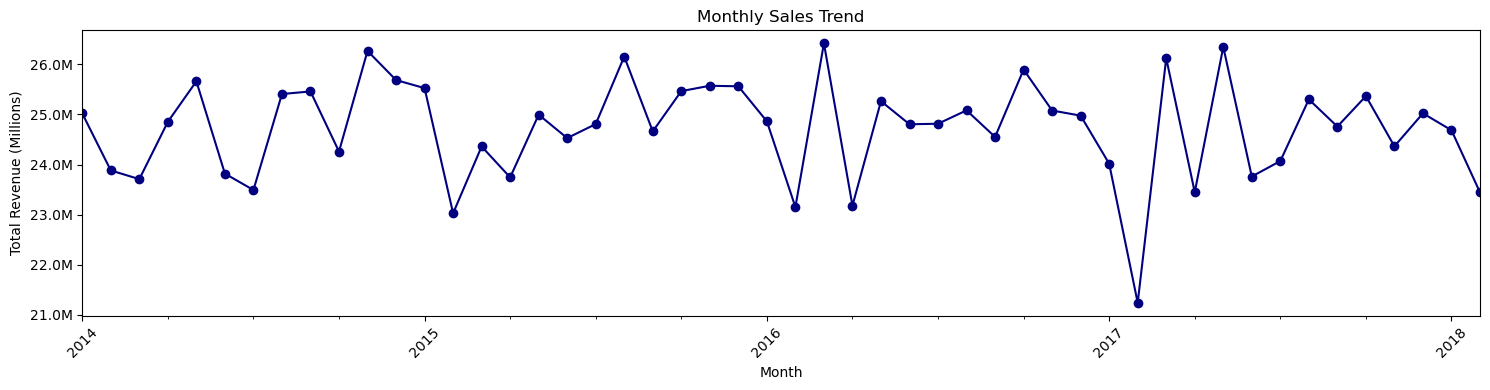

In [68]:

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create order month
df['order_month'] = df['order_date'].dt.to_period('M')

# Group by month and sum revenue
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Plotting
plt.figure(figsize=(15, 4))
monthly_sales.plot(marker='o', color='navy')  

# Formatter for Y-axis
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)  

# Titles and labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')  

# X-axis ticks
plt.xticks(rotation=45)  

plt.tight_layout()
plt.show()


#### NSIGHTS ---
Sales consistently cycle between 26 M and 26 M , with clear peaks in late spring to early summer (May–June) and troughs each January.

The overall trend remains stable year over year, reflecting a reliable seasonal demand pattern.

However, the sharp revenue drop in early 2017 stands out as an outlier, warranting closer investigation into potential causes such as market disruptions or mistimed promotions.

# 2. Monthly Sales Trend (All Years Combined)
Goal: Highlight overall seasonality patterns by aggregating sales across all years for each calendar month

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers, months ordered January to December based on month number

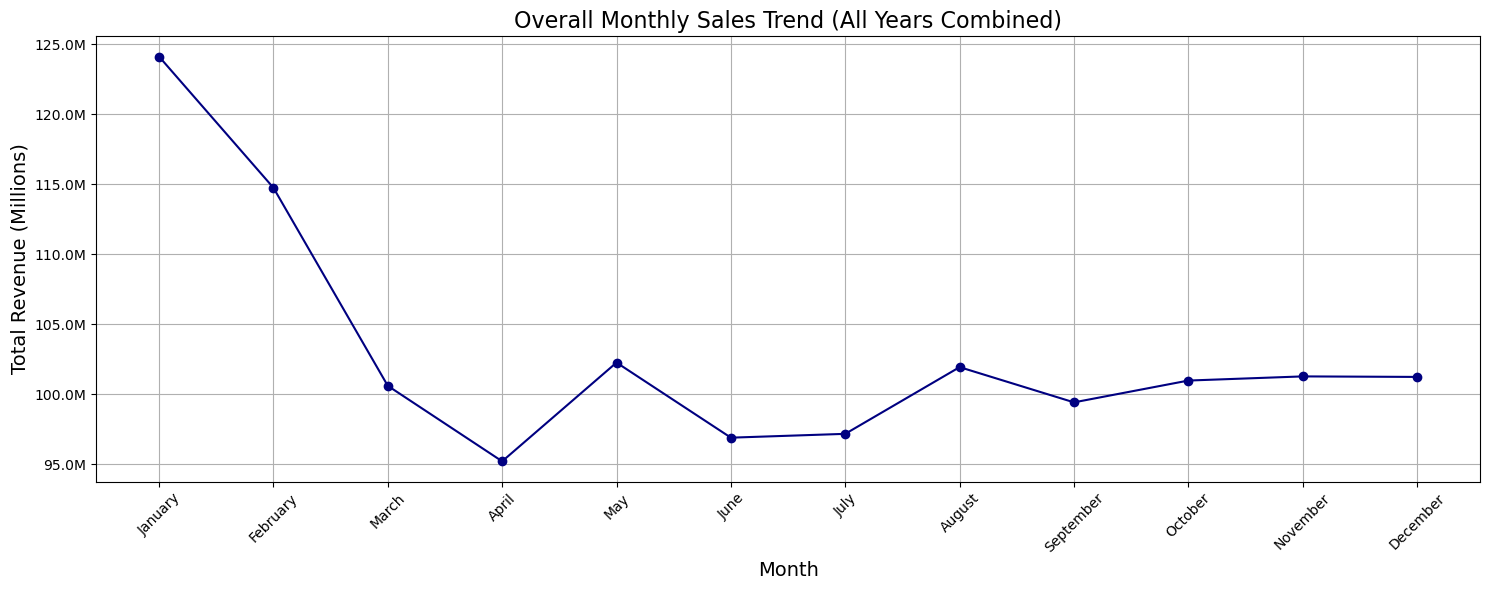

In [69]:


# Convert 'order_date' to datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract the month name (for better readability)
df['order_month'] = df['order_date'].dt.month_name()

# month numbers for sorting
df['month_number'] = df['order_date'].dt.month

# Group by month and sum the revenue across all years
monthly_sales = df.groupby(['month_number', 'order_month'])['revenue'].sum().reset_index()

# Sort by month number to get months in order (January to December)
monthly_sales = monthly_sales.sort_values('month_number')

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(monthly_sales['order_month'], monthly_sales['revenue'], marker='o', color='navy')

# Formatting y-axis to show revenue in millions
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Titles and labels
plt.title('Overall Monthly Sales Trend (All Years Combined)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue (Millions)', fontsize=14)

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Insights
The overall monthly sales trend reveals that January consistently records the highest revenue, indicating strong post-holiday or new-year demand. Sales gradually decline through April, which marks the lowest-performing month. A slight recovery is observed in May and August, suggesting possible mid-year seasonal boosts. From June onward, sales stabilize with minor fluctuations but never regain January’s peak. These patterns highlight the need for targeted strategies during Q2 to counteract the mid-year dip.

#  3. Top 10 Products by Revenue (in Millions)
Goal: Identify the highest-grossing products to focus marketing and inventory efforts

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

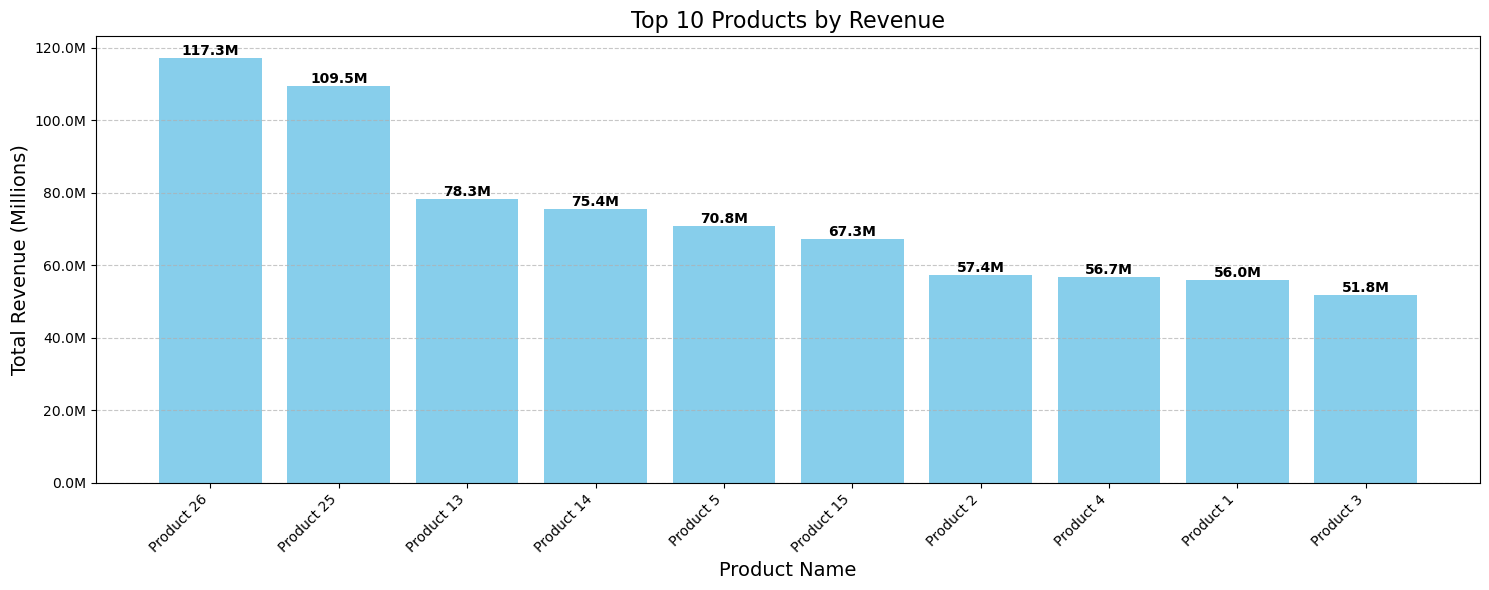

In [48]:

# Group by product name and sum the revenue
top_products = df.groupby('procuct_name')['revenue'].sum().reset_index()

# Sort by revenue and take top 10
top_products = top_products.sort_values(by='revenue', ascending=False).head(10)

# Plotting
plt.figure(figsize=(15, 6))
bars = plt.bar(top_products['procuct_name'], top_products['revenue'], color='skyblue')

# Format y-axis to millions
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Adding labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height / 1e6:.1f}M', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title('Top 10 Products by Revenue', fontsize=16)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Total Revenue (Millions)', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### INSIGHTS ---
Products 26 and 25 pull away at 118 M and 110 M , with a sharp drop to 78 M for product 13 and a tight mid 68–$75 M.

The bottom four cluster at 
57 M, highlighting similar constraints.

Focus on growth pilots for the mid-tier and efficiency gains for the lower earners to drive significant lifts

 # 4. Sales by Channel (Pie Chart)
Goal: Show distribution of total sales across channels to identify dominant sales routes

Chart: Pie chart

EDA Type: Univariate

Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted

<function matplotlib.pyplot.show(close=None, block=None)>

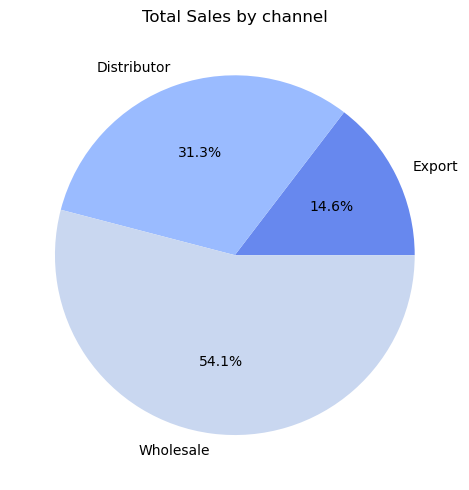

In [70]:
### sales by channel

chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending = True)
plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels= chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)
plt.title('Total Sales by channel')
plt.tight_layout()
plt.show

#### INSIGHTS ---
Wholesale accounts for 54 % of sales, with distributors at ~31 % and exports at ~15 %, underscoring reliance on domestic bulk channels.

To diversify revenue and mitigate concentration risk, prioritize expanding export initiatives—through targeted overseas marketing and strategic partner relationships.

# 5. Average Order Value (AOV) Distribution
Goal: Understand distribution of order values to identify typical spending levels and outliers

Chart: Histogram

EDA Type: Univariate

Structure: Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

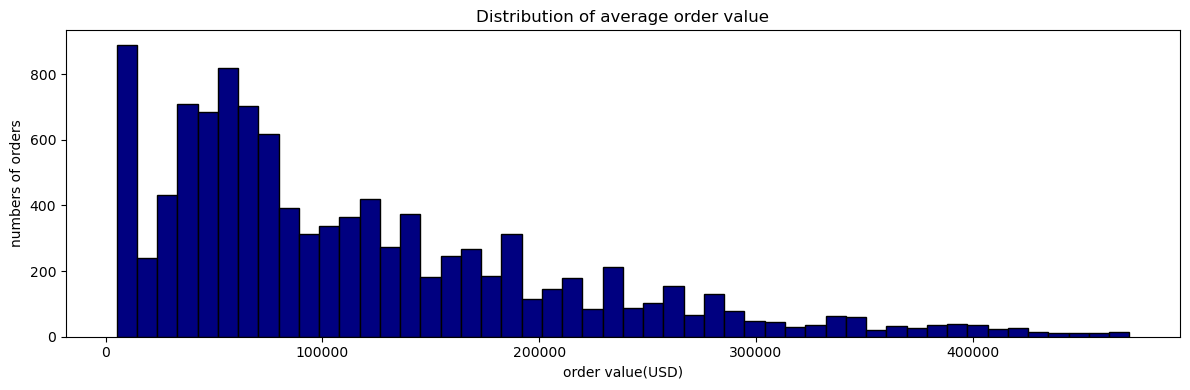

In [63]:
## average ordervalue (AOV) Distribution
aov = df.groupby('order_no')['revenue'].sum()
plt.figure(figsize=(12,4))
plt.hist(
    aov,
    bins=50,
    color='navy',
    edgecolor='black'
)
plt.title('Distribution of average order value')
plt.xlabel('order value(USD)')
plt.ylabel('numbers of orders')

plt.tight_layout()
plt.show()
    

#### INSIGHTS ---
The order‐value distribution is heavily right‐skewed, with most orders clustering between 
120 K and a pronounced mode around 
60 K.

A long tail of high-value transactions extends up toward 
500 K, but these large orders represent only a small share of total volume.

In [64]:
# unit price distibution  per product 
# top 10 states by revenue and order count
# average profit marging by channel
# top and bottom 10 customers by revenue  
# customer segmentation : Revenue vs proffit margin 
# correlation heatmap 

# 6. Unit Price Distribution per Product
Goal: Compare pricing variability across different products to identify price consistency and outliers

Chart: Boxplot

EDA Type: Bivariate

Structure: Boxplot with rotated labels to display unit price spread per product

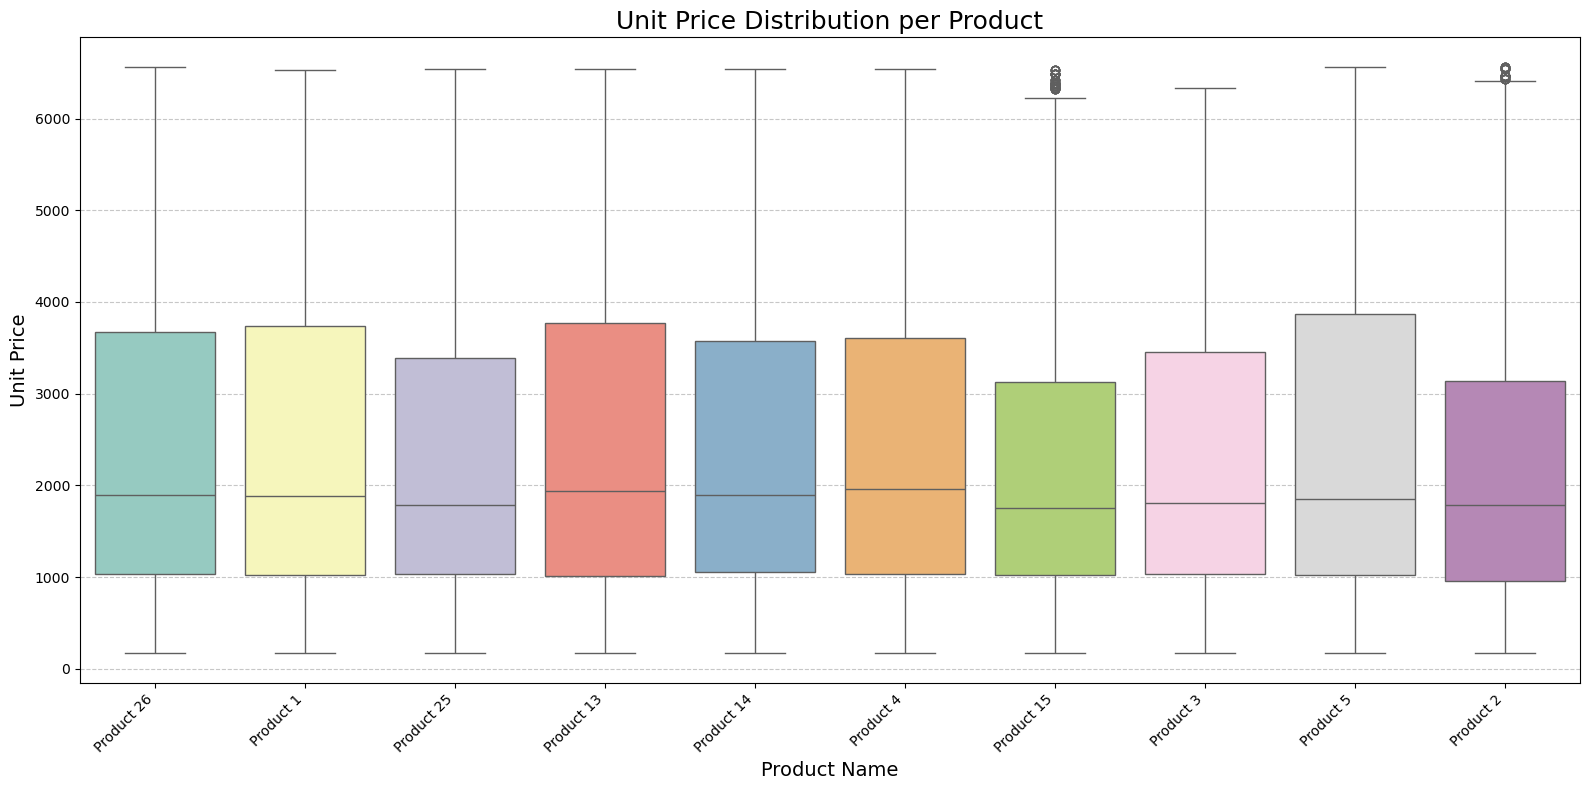

In [71]:

# Select top 10 products by number of orders (optional to keep the plot readable)
top_products = df['procuct_name'].value_counts().head(10).index
filtered_df = df[df['procuct_name'].isin(top_products)]

# Plotting with future-proof syntax
plt.figure(figsize=(16, 8))
sns.boxplot(data=filtered_df, x='procuct_name', y='unit_price', hue='procuct_name', palette='Set3', legend=False)

# Titles and labels
plt.title('Unit Price Distribution per Product', fontsize=18)
plt.xlabel('Product Name', fontsize=14)
plt.ylabel('Unit Price', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


#### INSIGHTS ---
Products 8, 17, 27, 20, and 28 show high-end revenue spikes—well above their upper whiskers—likely due to bulk orders, special-edition releases, or premium bundles that temporarily inflate earnings.

In contrast, deep low-end outliers (near 0-100) on Products 20 and 27 suggest promotional giveaways or test SKUs that pull down average prices.

To ensure accurate margin and pricing assessments, exclude these outlier transactions from average calculations.

Then assess whether such anomalies warrant formalization as ongoing promotional strategies or should be phased out to stabilize pricing performance.

# 7. Top 10 States by Revenue and Order Count
Goal: Identify highest revenue-generating states and compare their order volumes

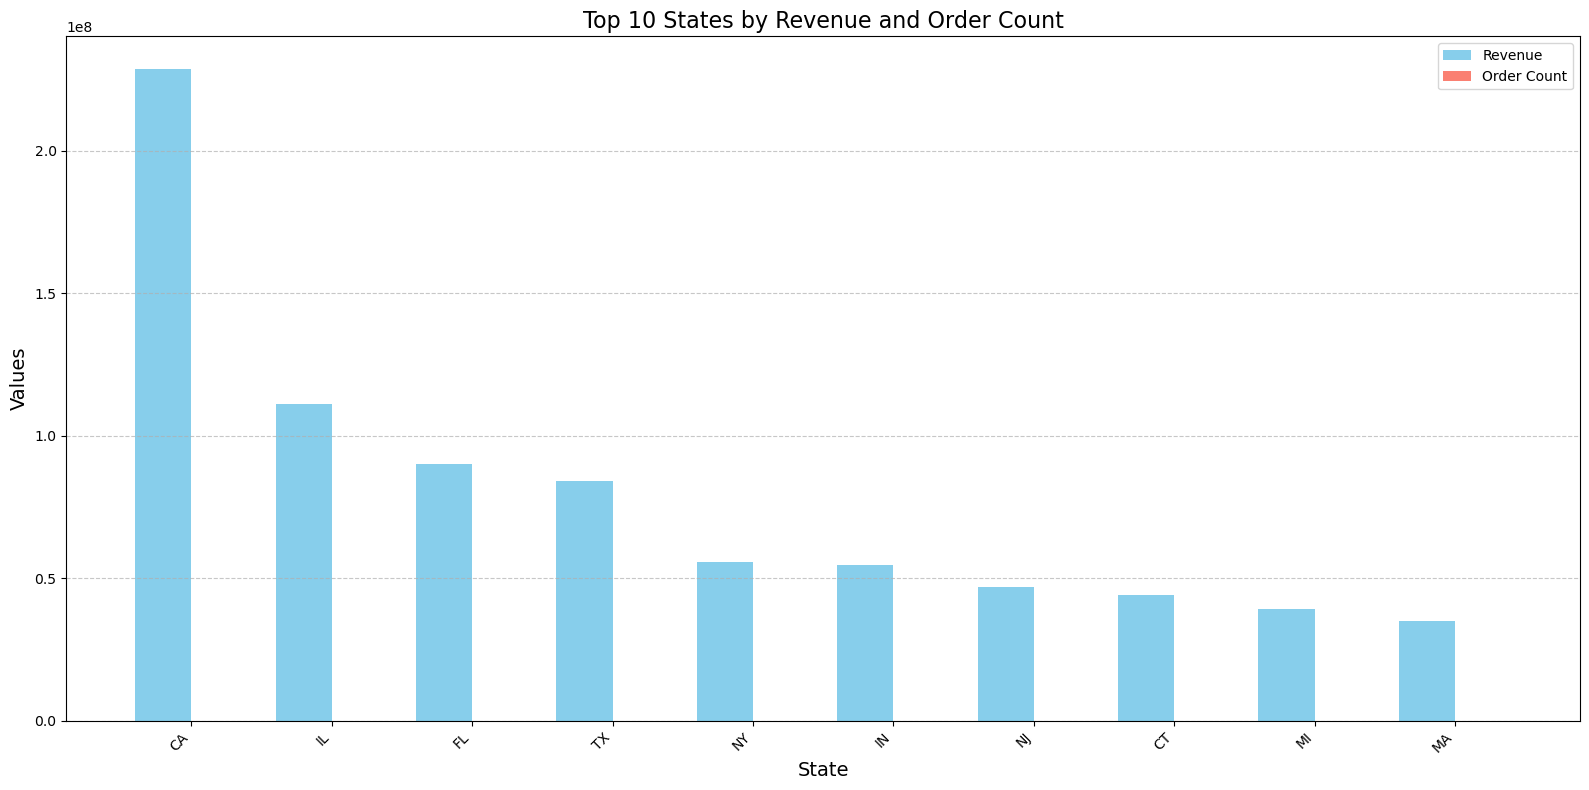

In [67]:

# Group by state to get total revenue and order count
state_summary = df.groupby('state').agg({'revenue': 'sum', 'order_no': 'count'}).reset_index()

# Rename columns for clarity
state_summary = state_summary.rename(columns={'order_no': 'order_count'})

# Sort by revenue and select top 10 states
top_states = state_summary.sort_values(by='revenue', ascending=False).head(10)

# Plotting side-by-side bar chart
plt.figure(figsize=(16, 8))

# Bar width
bar_width = 0.4
x = range(len(top_states))

# Plot revenue bars
plt.bar(x, top_states['revenue'], width=bar_width, label='Revenue', color='skyblue')

# Plot order count bars next to revenue bars
plt.bar([i + bar_width for i in x], top_states['order_count'], width=bar_width, label='Order Count', color='salmon')

# Labels and title
plt.xlabel('State', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Top 10 States by Revenue and Order Count', fontsize=16)
plt.xticks([i + bar_width / 2 for i in x], top_states['state'], rotation=45, ha='right')

# Add legend
plt.legend()

# Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#  8. Average Profit Margin by Channel
Goal: Compare average profit margins across sales channels to identify the most and least profitable routes

Chart: Bar chart

EDA Type: Bivariate

Structure: Vertical bars with data labels showing margin percentages, sorted descending by channel

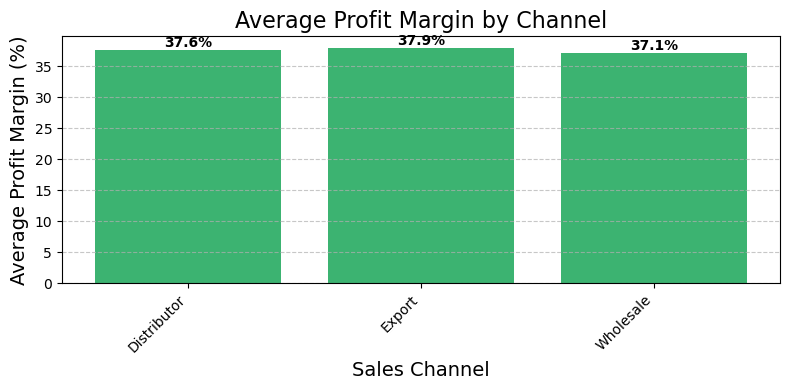

In [72]:

# Group by 'channel' and calculate average profit margin
channel_profit_margin = df.groupby('channel')['profit_margin_pct'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 4))
bars = plt.bar(channel_profit_margin['channel'], channel_profit_margin['profit_margin_pct'], color='mediumseagreen')

# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
plt.title('Average Profit Margin by Channel', fontsize=16)
plt.xlabel('Sales Channel', fontsize=14)
plt.ylabel('Average Profit Margin (%)', fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#### INSIGHTS ---
Export leads with a 37.93 % average margin, closely followed by Distributor (37.56 %) and Wholesale (37.09 %).

The tiny spread (<0.2 %) shows consistently strong profitability across all channels.

This uniformity implies well-controlled costs and pricing power everywhere.

To maximize returns, push volume growth in Export while maintaining efficiency in Distributor and Wholesale.

# 9. Top 10 and Bottom 10 Customers by Revenue

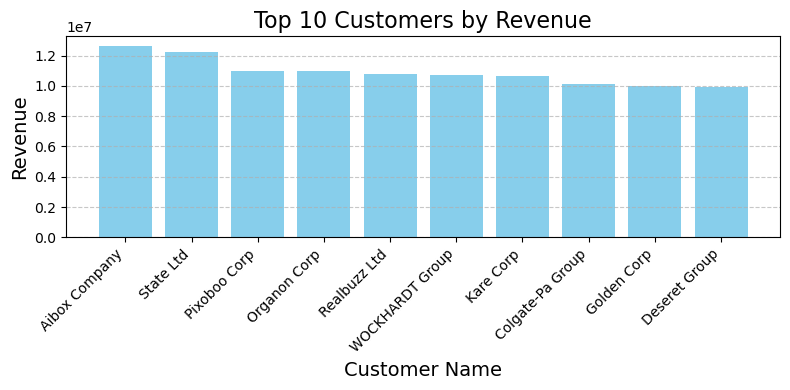

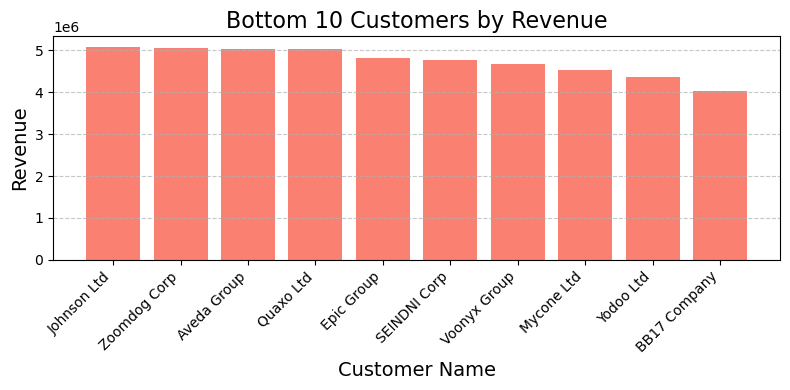

In [73]:

# Group by customer name and sum the revenue
customer_revenue = df.groupby('customer_name')['revenue'].sum().reset_index()

# Sort customers by revenue
sorted_customers = customer_revenue.sort_values(by='revenue', ascending=False)

# Select top 10 and bottom 10 customers
top_10_customers = sorted_customers.head(10)
bottom_10_customers = sorted_customers.tail(10)

# Plotting Top 10 Customers
plt.figure(figsize=(8, 4))
plt.bar(top_10_customers['customer_name'], top_10_customers['revenue'], color='skyblue')
plt.title('Top 10 Customers by Revenue', fontsize=16)
plt.xlabel('Customer Name', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plotting Bottom 10 Customers
plt.figure(figsize=(8, 4))
plt.bar(bottom_10_customers['customer_name'], bottom_10_customers['revenue'], color='salmon')
plt.title('Bottom 10 Customers by Revenue', fontsize=16)
plt.xlabel('Customer Name', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# 10. Customer Segmentation: Revenue vs. Profit Margin
Goal: Segment customers by total revenue and average profit margin, highlighting order volume

Chart: Bubble chart (scatter plot with variable point sizes)

EDA Type: Multivariate

Structure: Scatter points sized by number of orders, plotting revenue vs. margin

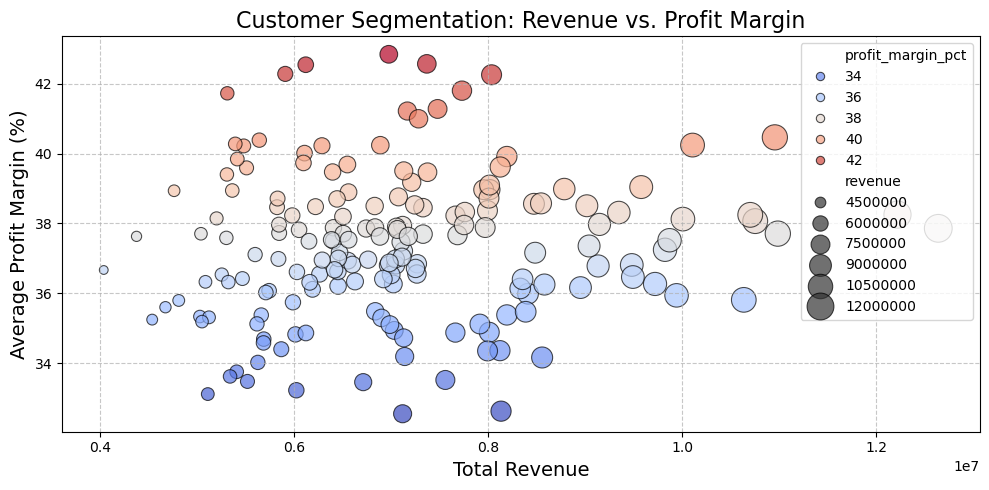

In [74]:

# Group by customer to calculate total revenue and average profit margin per customer
customer_segmentation = df.groupby('customer_name').agg({
    'revenue': 'sum',
    'profit_margin_pct': 'mean'  # Average profit margin
}).reset_index()

# Plotting
plt.figure(figsize=(10, 5))
sns.scatterplot(data=customer_segmentation, x='revenue', y='profit_margin_pct', hue='profit_margin_pct', palette='coolwarm', size='revenue', sizes=(40, 400), alpha=0.7, edgecolor='k')

# Titles and labels
plt.title('Customer Segmentation: Revenue vs. Profit Margin', fontsize=16)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Average Profit Margin (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


 # 11. Correlation Heatmap of Numeric Features
Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap with correlation coefficients for selected numeric columns

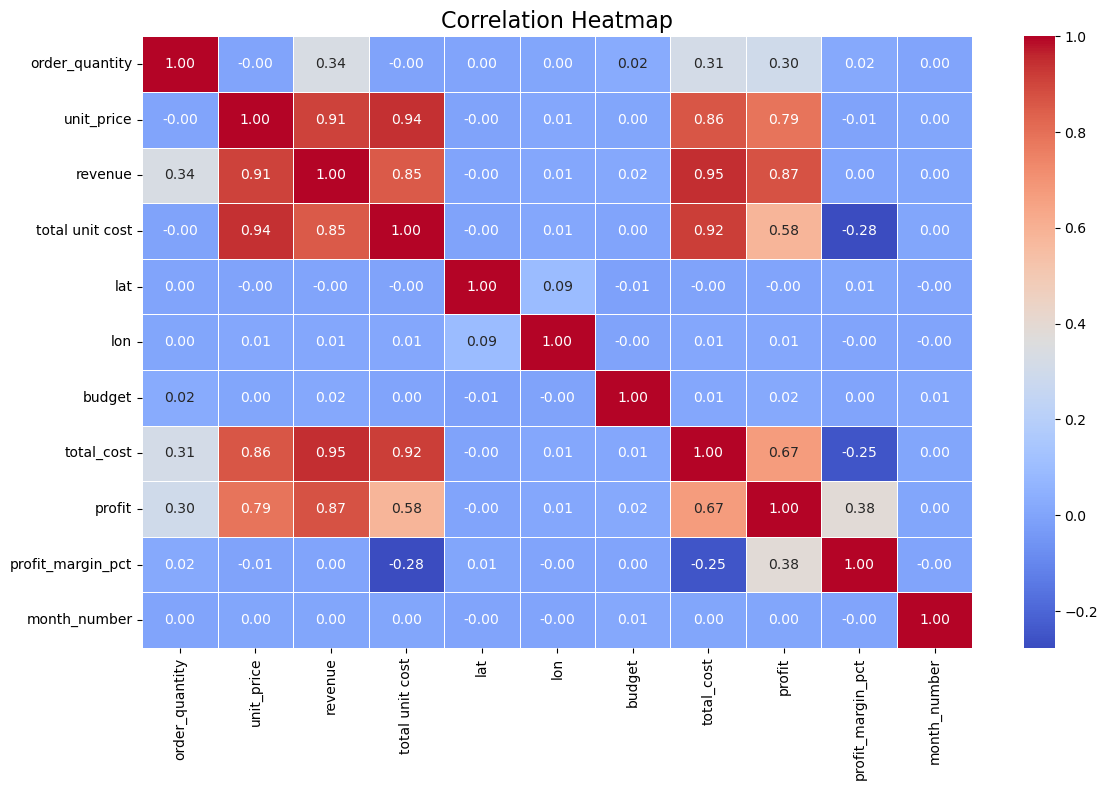

In [73]:

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Titles and layout
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


#### INSIGHTS ---
Profit and revenue are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.
Unit price is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.
Cost shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.
Quantity has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.

# 12. Top 10 Products by Revenue (in Millions)
Goal: Identify the highest-grossing products to focus marketing and inventory efforts

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

C:\Users\hp\AppData\Local\Temp\ipykernel_12696\2689819672.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


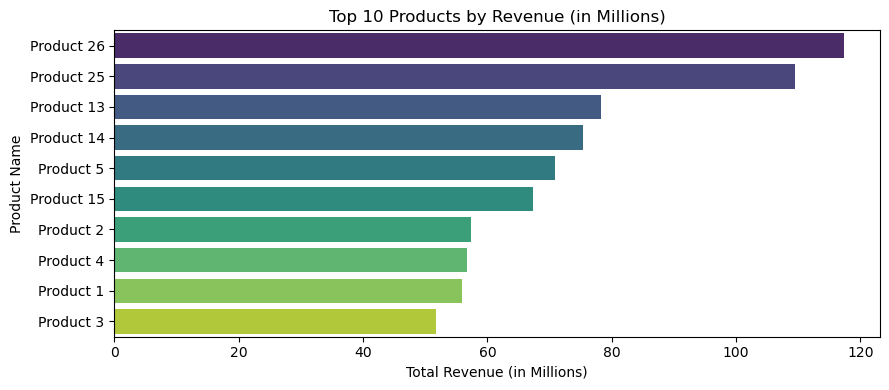

In [86]:
# Calculate total revenue for each product and convert values to millions
top_prod = df.groupby('procuct_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_prod = top_prod.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x=top_prod.values,    # X-axis: revenue values in millions
    y=top_prod.index,     # Y-axis: product names
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label

# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

# 13. Top 10 Products by Avg Profit Margin
Goal: Compare average profitability across products to identify high-margin items

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with average profit margin values

C:\Users\hp\AppData\Local\Temp\ipykernel_12696\3306699091.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


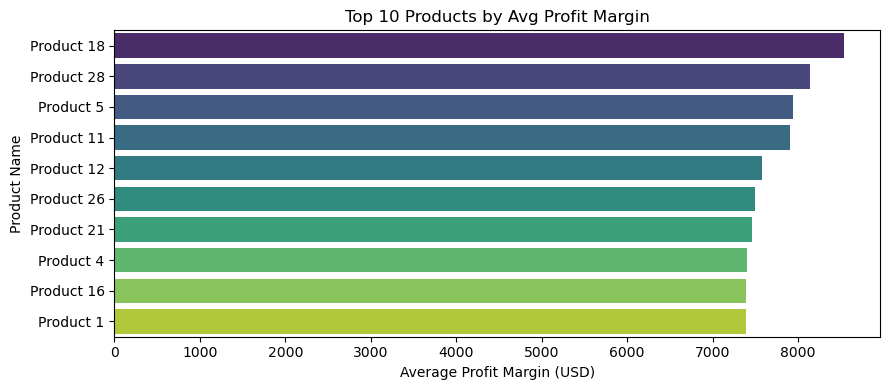

In [87]:
# 1️⃣ Compute average profit per product and take the top 10
top_margin = (
    df.groupby('procuct_name')['profit']
      .mean()                        # Calculate mean profit for each product
      .sort_values(ascending=False)  # Sort from highest to lowest average profit
      .head(10)                      # Keep only the top 10 products
)

# 2️⃣ Set the figure size for clarity
plt.figure(figsize=(9, 4))

# 3️⃣ Plot a horizontal bar chart
sns.barplot(
    x=top_margin.values,    # X-axis: average profit values
    y=top_margin.index,     # Y-axis: product names
    palette='viridis'       # Color palette for the bars
)

# 4️⃣ Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')  # Chart title
plt.xlabel('Average Profit Margin (USD)')          # X-axis label
plt.ylabel('Product Name')                         # Y-axis label

# 5️⃣ Adjust layout to prevent clipping and show the plot
plt.tight_layout()
plt.show()
     

# 14. Profit Margin % vs. Unit Price
Goal: Examine relationship between unit price and profit margin percentage across orders

Chart: Scatter plot

EDA Type: Bivariate

Structure: Scatter points with transparency to show data density

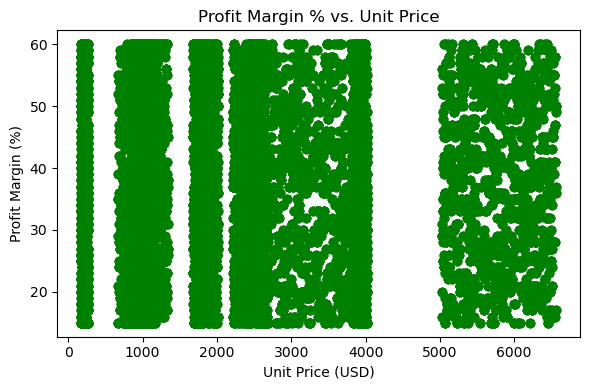

In [89]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

 #### INSIGHTS ---
Profit margins are concentrated between ~18% and 60%, with no clear correlation to unit price, which spans from near 
6,500.

Dense horizontal bands indicate consistent margin tiers across a wide price spectrum, reflecting uniform pricing strategies.

Outliers below 18% at both low and high price points may signal cost inefficiencies or pricing issues worth deeper investigation.

# 15. Total Sales by US Region
Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

Chart: Horizontal bar chart

EDA Type: Univariate comparison

Structure:

Bars sorted ascending (Northeast → West) for clear bottom‑to‑top ranking
X‑axis in millions USD, Y‑axis listing regions

C:\Users\hp\AppData\Local\Temp\ipykernel_12696\422893694.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


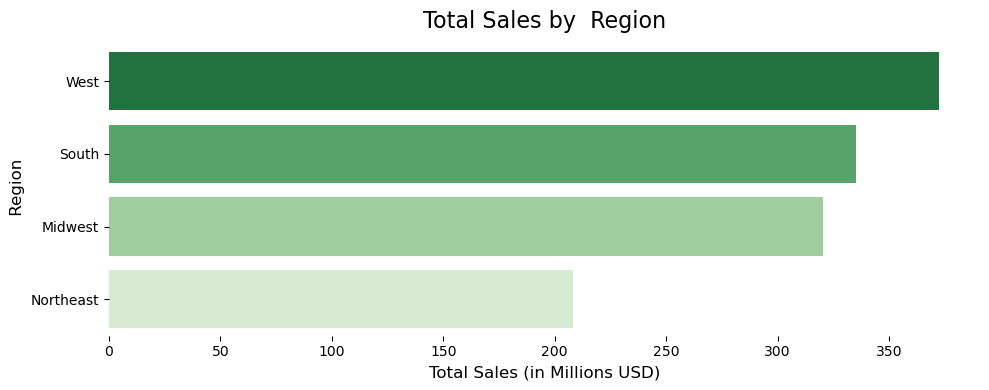

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by  Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel(' Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

#### INSIGHTS — 
West leads the market with approximately $360M in sales (~35%), confirming its dominant position.

South and Midwest follow closely with over $320M each (~32%), reflecting strong and steady demand.

Northeast lags behind at around $210M (~20%), highlighting a significant growth opportunity.

Action: Prioritize targeted campaigns and partnerships in the Northeast to close the gap, while sustaining proven strategies in high-performing regions.

# Saving Pre-Processed Dataframe

In [75]:
df.to_excel('df.xlsx', index=False)

In [77]:
df

,order_no,order_date,channel,order_quantity,unit_price,revenue,total unit cost,customer_name,procuct_name,county,...,lat,lon,state code,region,budget,total_cost,profit,profit_margin_pct,order_month,month_number
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Chatham County,...,32.08354,-81.09983,GA,South,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Johnson County,...,39.61366,-86.10665,IN,Midwest,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Alameda County,...,37.66243,-121.87468,CA,West,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Monroe County,...,39.16533,-86.52639,IN,Midwest,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Hartford County,...,41.77524,-72.52443,CT,Northeast,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,12,1815.7,21788.4,980.478,Dazzlesphe Corp,Product 26,Bucks County,...,40.15511,-74.82877,PA,Northeast,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Export,6,864.3,5185.8,579.081,Yombu Corp,Product 21,Cook County,...,42.11030,-88.03424,IL,Midwest,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Distributor,11,3953.0,43483.0,2648.510,Bath Group,Product 13,Broward County,...,26.24453,-80.20644,FL,South,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Distributor,7,3959.7,27717.9,2930.178,Linklinks Ltd,Product 20,Erie County,...,42.91002,-78.74182,NY,Northeast,NaN,20511.246,7206.654,26.0,February,2


In [78]:
df.to_csv('df.csv', index=False)


 # Key Insights:

 #### 1. Monthly Revenue Trends:
Revenue remains relatively stable between $23M and $26.5M throughout 2014–2017, showing no consistent seasonal spikes. A notable dip to $21.2M in early 2017 suggests a potential one-time disruption that may warrant further review.

####  2. Sales Channel Distribution:

      Wholesale: 54%

      Distributors: 31%

      Exports: 15%
      This breakdown highlights a strong domestic focus, with significant room to grow the international market.

#### 3. Top-Performing Products (by Revenue):

     Product 26: $118M

     Product 25: $110M

     Product 13: $78M

     Mid-tier products generate $68M–$75M, while lower performers fall within $52M–$57M.

#### 4. Profit Margin Analysis:
     Profit margins vary widely from 18% to 60%, but show no clear link to unit pricing. The presence of dense horizontal bands suggests uniform    pricing structures across product tiers.

#### 5. Seasonal Sales Volume:
There is no strong seasonal pattern, though a slight volume increase occurs around May–June. The sharp decline in early 2017 aligns with the earlier mentioned revenue dip and may need deeper analysis.

#### 6. Regional Market Performance:

California: Top performer with ~$230M in revenue and over 7,500 orders.

Illinois, Florida, Texas: Each generates $85M–$110M from 3,500–4,500 orders.

New York and Indiana: Contribute ~$54M each, with 2,000+ orders.

These insights can inform regional strategies, product development, and expansion plans, especially in under-penetrated export markets.

# Recommendations
#### Outlier Strategy:
Exclude or formalize bulk-order and promotional SKUs when calculating averages.
#### Margin Uplift:
Apply top-product pricing levers to mid/low tiers; cut costs on underperformers.
#### Export Growth:
    Invest in targeted overseas marketing and distributor partnerships.
#### Seasonal Planning:
Shift spend toward January trough and May–June peak; investigate the 2017 anomaly.
#### Dashboard Prep: 
Build aggregated tables for time series, channel mix, and product performance for Power BI.